In [1]:
library(alakazam)
library(dplyr)

Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data(ExampleDb)
db <- ExampleDb[ExampleDb$SAMPLE == "+7d", ]

In [3]:
db_props <- aminoAcidProperties(db, seq="JUNCTION", nt=TRUE, trim=TRUE, 
                                label="CDR3")

# The full set of properties are calculated by default
dplyr::select(db_props[1:3, ], starts_with("CDR3"))

,CDR3_AA_LENGTH,CDR3_AA_GRAVY,CDR3_AA_BULK,CDR3_AA_ALIPHATIC,CDR3_AA_POLARITY,CDR3_AA_CHARGE,CDR3_AA_BASIC,CDR3_AA_ACIDIC,CDR3_AA_AROMATIC
1001,29,0.1724138,14.12345,0.8034483,8.168966,0.03902939,0.1034483,0.06896552,0.06896552
1002,29,-0.3482759,14.69034,0.6724138,8.255172,2.21407038,0.2068966,0.06896552,0.27586207
1003,26,-0.9884615,13.96154,0.5653846,8.873077,1.11045407,0.2307692,0.15384615,0.19230769


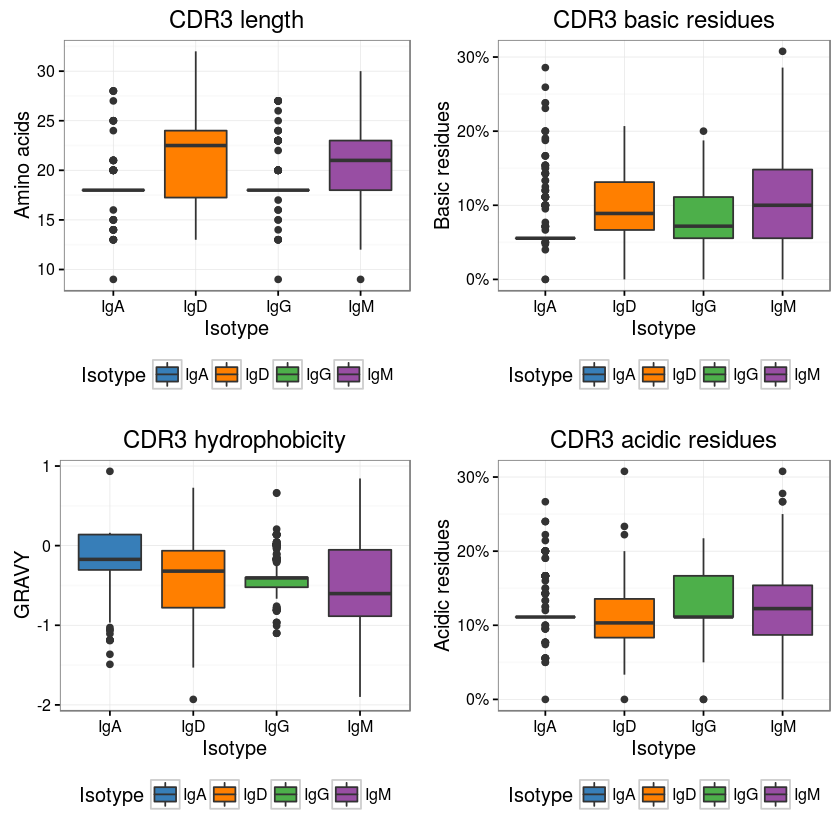

In [4]:
# Define a ggplot theme for all plots
tmp_theme <- theme_bw() + theme(legend.position="bottom")

# Generate plots for a four of the properties
g1 <- ggplot(db_props, aes(x=ISOTYPE, y=CDR3_AA_LENGTH)) + tmp_theme +
    ggtitle("CDR3 length") + 
    xlab("Isotype") + ylab("Amino acids") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=ISOTYPE))
g2 <- ggplot(db_props, aes(x=ISOTYPE, y=CDR3_AA_GRAVY)) + tmp_theme + 
    ggtitle("CDR3 hydrophobicity") + 
    xlab("Isotype") + ylab("GRAVY") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=ISOTYPE))
g3 <- ggplot(db_props, aes(x=ISOTYPE, y=CDR3_AA_BASIC)) + tmp_theme +
    ggtitle("CDR3 basic residues") + 
    xlab("Isotype") + ylab("Basic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=ISOTYPE))
g4 <- ggplot(db_props, aes(x=ISOTYPE, y=CDR3_AA_ACIDIC)) + tmp_theme +
    ggtitle("CDR3 acidic residues") + 
    xlab("Isotype") + ylab("Acidic residues") +
    scale_y_continuous(labels=scales::percent) +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot(aes(fill=ISOTYPE))

# Plot in a 2x2 grid
gridPlot(g1, g2, g3, g4, ncol=2)

In [5]:
# Translate junction DNA sequences to amino acids and trim first and last codons
cdr3 <- translateDNA(db$JUNCTION[1:3], trim=TRUE)

# Grand average of hydrophobicity
gravy(cdr3)

[1]  0.1724138 -0.3482759 -0.9884615